Plots for population level time constants:
1. Three methods like on Fig.2 in the paper (plot using constrained dataset)
2. Taus from three methods plus values from the paper )with confidence intervals) - constrained and full dataset. Plot results from the fit using all units (not the mean ACF)

In [5]:
import pandas as pd
import numpy as np
import json
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
current_wd = os.getcwd()
#os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
os.chdir(os.path.abspath("..\\..\\..\\scripts"))
from calculate_tau import fit_single_exp, fit_single_exp_2d, func_single_exp_monkey
from cfg_global import project_folder_path
os.chdir(current_wd)

In [6]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
empty_suffix = 'no'

In [4]:
results_folder = project_folder_path + 'results\\monkey\\'
fig_folder = results_folder + '\\fig_drafts_paper_reduce\\'
results_folder_current = project_folder_path + 'results\\monkey\\fixation_period_1000ms_' + empty_suffix + '_empty\\'

### Get the data

In [7]:
pfdl_dataset_constraints_df = pd.read_pickle(results_folder + 'pfdl_dataset_constraints_1000ms_' + empty_suffix + '_empty_df.pkl')
pfp_dataset_constraints_df = pd.read_pickle(results_folder + 'pfp_dataset_constraints_1000ms_' + empty_suffix + '_empty_df.pkl')
# get subsets based on constraints 
pfdl_dataset_constraints_subset_df = pfdl_dataset_constraints_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1').copy()
pfp_dataset_constraints_subset_df = pfp_dataset_constraints_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1').copy()
print(f'n units pfdl {len(pfdl_dataset_constraints_subset_df)}, pfp {len(pfp_dataset_constraints_subset_df)}')

n units pfdl 380, pfp 328


In [8]:
### pearsonr trial avg
pfdl_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder_current + 'binned\\pfdl\\acf\\' 
                                                    + 'acf_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_acf_average_trial_pearsonr_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfdl_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

pfp_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder_current + 'binned\\pfp\\acf\\' 
                                                   + 'acf_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_acf_average_trial_pearsonr_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfp_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

### sttc trial avg
pfdl_acf_average_trial_sttc_df = pd.read_pickle(results_folder_current + 'non_binned\\pfdl\\acf\\' 
                                                + 'acf_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_acf_average_trial_sttc_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfdl_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

pfp_acf_average_trial_sttc_df = pd.read_pickle(results_folder_current + 'non_binned\\pfp\\acf\\' 
                                               + 'acf_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_acf_average_trial_sttc_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfp_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

### sttc trial concat
pfdl_sttc_trial_concat_df = pd.read_pickle(results_folder_current + 'non_binned\\pfdl\\acf\\' 
                                                + 'acf_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_sttc_trial_concat_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_sttc_trial_concat_df, 
                                                                              on='unit_id', how='left')
pfdl_sttc_trial_concat_subset_df.reset_index(inplace=True, drop=True)

pfp_sttc_trial_concat_df = pd.read_pickle(results_folder_current + 'non_binned\\pfp\\acf\\' 
                                               + 'acf_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_sttc_trial_concat_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_sttc_trial_concat_df, 
                                                                              on='unit_id', how='left')
pfp_sttc_trial_concat_subset_df.reset_index(inplace=True, drop=True)

# check NaNs and number of units

print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_pearsonr_subset_df), 
                                                          len(pfp_acf_average_trial_pearsonr_subset_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_sttc_subset_df), 
                                                          len(pfp_acf_average_trial_sttc_subset_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_sttc_trial_concat_subset_df), 
                                                          len(pfp_sttc_trial_concat_subset_df)))

print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_pearsonr_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_pearsonr_subset_df.isnull().any().any()))
print('NaNs in PFdl acf {}'.format(pfdl_sttc_trial_concat_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_sttc_trial_concat_subset_df.isnull().any().any()))
print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_sttc_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_sttc_subset_df.isnull().any().any()))

print('\nNaNs in full datasets...')
print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_pearsonr_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_pearsonr_df.isnull().any().any()))
print('NaNs in PFdl acf {}'.format(pfdl_sttc_trial_concat_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_sttc_trial_concat_df.isnull().any().any()))
print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_sttc_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_sttc_df.isnull().any().any()))

N neurons in PFdl 380 
N neurons in PFp 328
N neurons in PFdl 380 
N neurons in PFp 328
N neurons in PFdl 380 
N neurons in PFp 328
NaNs in PFdl acf False
NaNs in PFp acf False
NaNs in PFdl acf False
NaNs in PFp acf False
NaNs in PFdl acf False
NaNs in PFp acf False

NaNs in full datasets...
NaNs in PFdl acf True
NaNs in PFp acf True
NaNs in PFdl acf False
NaNs in PFp acf False
NaNs in PFdl acf False
NaNs in PFp acf False


### Calculate tau

In [9]:
def calc_population_tau(acf_df_, acf_cols_, start_idx_, func_to_fit_):
    acf_2d = acf_df_[acf_cols_].values
    acf_mean = np.nanmean(acf_2d, axis=0)
    #acf_sem = stats.sem(acf_2d, axis=0)
    fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(acf_mean, start_idx_, func_to_fit_)
    print(f'tau {tau*50}, 95% CI {tau_ci[0]*50},{tau_ci[1]*50}')
    return {'tau_ms':tau*50,
            'tau_lower_ms':tau_ci[0]*50, 
            'tau_upper_ms':tau_ci[1]*50, 
            'fit_r_squared': fit_r_squared, 
            'explained_var': explained_var, 
            'popt': fit_popt}

def calc_population_tau_2d(acf_df_, acf_cols_, start_idx_, func_to_fit_):
    acf_2d = acf_df_[acf_cols_].values
    fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp_2d(acf_2d, start_idx_, func_to_fit_)
    print(f'tau {tau*50}, 95% CI {tau_ci[0]*50},{tau_ci[1]*50}')
    return {'tau_ms':tau*50,
            'tau_lower_ms':tau_ci[0]*50, 
            'tau_upper_ms':tau_ci[1]*50, 
            'fit_r_squared': fit_r_squared, 
            'explained_var': explained_var, 
            'popt': fit_popt}

In [10]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags)]

In [11]:
population_level_dict = {}
population_level_dict_2d = {}

print('Fitting mean ACF...')
population_level_dict['pearsonr_trial_avg_pfdl'] = calc_population_tau(pfdl_acf_average_trial_pearsonr_subset_df, acf_cols, 2, func_single_exp_monkey)
population_level_dict['pearsonr_trial_avg_pfp'] = calc_population_tau(pfp_acf_average_trial_pearsonr_subset_df, acf_cols, 2, func_single_exp_monkey)

population_level_dict['sttc_trial_avg_pfdl'] = calc_population_tau(pfdl_acf_average_trial_sttc_subset_df, acf_cols, 2, func_single_exp_monkey)
population_level_dict['sttc_trial_avg_pfp'] = calc_population_tau(pfp_acf_average_trial_sttc_subset_df, acf_cols, 2, func_single_exp_monkey)

population_level_dict['sttc_trial_concat_pfdl'] = calc_population_tau(pfdl_sttc_trial_concat_subset_df, acf_cols, 2, func_single_exp_monkey)
population_level_dict['sttc_trial_concat_pfp'] = calc_population_tau(pfp_sttc_trial_concat_subset_df, acf_cols, 2, func_single_exp_monkey)

print('Fitting all unit ACFs...')
population_level_dict_2d['pearsonr_trial_avg_pfdl'] = calc_population_tau_2d(pfdl_acf_average_trial_pearsonr_subset_df, acf_cols, 2, func_single_exp_monkey)
population_level_dict_2d['pearsonr_trial_avg_pfp'] = calc_population_tau_2d(pfp_acf_average_trial_pearsonr_subset_df, acf_cols, 2, func_single_exp_monkey)

population_level_dict_2d['sttc_trial_avg_pfdl'] = calc_population_tau_2d(pfdl_acf_average_trial_sttc_subset_df, acf_cols, 2, func_single_exp_monkey)
population_level_dict_2d['sttc_trial_avg_pfp'] = calc_population_tau_2d(pfp_acf_average_trial_sttc_subset_df, acf_cols, 2, func_single_exp_monkey)

population_level_dict_2d['sttc_trial_concat_pfdl'] = calc_population_tau_2d(pfdl_sttc_trial_concat_subset_df, acf_cols, 2, func_single_exp_monkey)
population_level_dict_2d['sttc_trial_concat_pfp'] = calc_population_tau_2d(pfp_sttc_trial_concat_subset_df, acf_cols, 2, func_single_exp_monkey)

Fitting mean ACF...
tau 239.4429990721251, 95% CI 221.7687404472282,257.11725769702196
tau 228.91162669276324, 95% CI 203.51535849109368,254.3078948944328
tau 231.80728637995216, 95% CI 213.34233681002658,250.27223594987774
tau 225.10165632107353, 95% CI 196.6448053522331,253.55850728991393
tau 209.6408982441221, 95% CI 196.70180146388554,222.57999502435868
tau 228.99110615093971, 95% CI 198.10812260320446,259.874089698675
Fitting all unit ACFs...
tau 239.4427441796883, 95% CI 207.63940247556073,271.24608588381585
tau 228.91381205142065, 95% CI 187.59067357896643,270.23695052387484
tau 231.8073043634339, 95% CI 200.36814505531785,263.2464636715499
tau 225.103140537318, 95% CI 185.9083942263739,264.2978868482621
tau 209.64089259029328, 95% CI 187.6743617433399,231.60742343724667
tau 228.99638728026667, 95% CI 196.96957105709555,261.0232035034378


In [18]:
pfdl_acf_average_trial_pearsonr_df.isna().any(axis=1).sum()

78

In [39]:
population_level_full_dict = {}
population_level_full_dict_2d = {}

# Personr has NaNs -remove those lines first (or replace with 0s)
print(f'N rows with NaNs in pfdl_acf_average_trial_pearsonr_df {pfdl_acf_average_trial_pearsonr_df.isna().any(axis=1).sum()}')
#pfdl_acf_average_trial_pearsonr_df_no_nans = pfdl_acf_average_trial_pearsonr_df.dropna()
pfdl_acf_average_trial_pearsonr_df_no_nans = pfdl_acf_average_trial_pearsonr_df.fillna(0)
print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_pearsonr_df_no_nans.isnull().any().any()))

print(f'N rows with NaNs in pfp_acf_average_trial_pearsonr_df {pfp_acf_average_trial_pearsonr_df.isna().any(axis=1).sum()}')
#pfp_acf_average_trial_pearsonr_df_no_nans = pfp_acf_average_trial_pearsonr_df.dropna()
pfp_acf_average_trial_pearsonr_df_no_nans = pfp_acf_average_trial_pearsonr_df.fillna(0)
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_pearsonr_df_no_nans.isnull().any().any()))

print('Fitting mean ACF...')
population_level_full_dict['pearsonr_trial_avg_pfdl'] = calc_population_tau(pfdl_acf_average_trial_pearsonr_df_no_nans, acf_cols, 2, func_single_exp_monkey)
population_level_full_dict['pearsonr_trial_avg_pfp'] = calc_population_tau(pfp_acf_average_trial_pearsonr_df_no_nans, acf_cols, 2, func_single_exp_monkey)

population_level_full_dict['sttc_trial_avg_pfdl'] = calc_population_tau(pfdl_acf_average_trial_sttc_df, acf_cols, 2, func_single_exp_monkey)
population_level_full_dict['sttc_trial_avg_pfp'] = calc_population_tau(pfp_acf_average_trial_sttc_df, acf_cols, 2, func_single_exp_monkey)

population_level_full_dict['sttc_trial_concat_pfdl'] = calc_population_tau(pfdl_sttc_trial_concat_df, acf_cols, 2, func_single_exp_monkey)
population_level_full_dict['sttc_trial_concat_pfp'] = calc_population_tau(pfp_sttc_trial_concat_df, acf_cols, 2, func_single_exp_monkey)

print('Fitting all unit ACFs...')

population_level_full_dict_2d['pearsonr_trial_avg_pfdl'] = calc_population_tau_2d(pfdl_acf_average_trial_pearsonr_df_no_nans, acf_cols, 2, func_single_exp_monkey)
population_level_full_dict_2d['pearsonr_trial_avg_pfp'] = calc_population_tau_2d(pfp_acf_average_trial_pearsonr_df_no_nans, acf_cols, 2, func_single_exp_monkey)

population_level_full_dict_2d['sttc_trial_avg_pfdl'] = calc_population_tau_2d(pfdl_acf_average_trial_sttc_df, acf_cols, 2, func_single_exp_monkey)
population_level_full_dict_2d['sttc_trial_avg_pfp'] = calc_population_tau_2d(pfp_acf_average_trial_sttc_df, acf_cols, 2, func_single_exp_monkey)

population_level_full_dict_2d['sttc_trial_concat_pfdl'] = calc_population_tau_2d(pfdl_sttc_trial_concat_df, acf_cols, 2, func_single_exp_monkey)
population_level_full_dict_2d['sttc_trial_concat_pfp'] = calc_population_tau_2d(pfp_sttc_trial_concat_df, acf_cols, 2, func_single_exp_monkey)

N rows with NaNs in pfdl_acf_average_trial_pearsonr_df 78
NaNs in PFdl acf False
N rows with NaNs in pfp_acf_average_trial_pearsonr_df 91
NaNs in PFp acf False
Fitting mean ACF...
tau 220.15869101866042, 95% CI 193.465456878576,246.85192515874485
tau 200.0925495366022, 95% CI 172.28536142269218,227.89973765051226
tau 229.61182884274774, 95% CI 210.27325331606193,248.95040436943356
tau 227.4533711264387, 95% CI 189.26042275297436,265.646319499903
tau 187.62393275448608, 95% CI 172.87388058506428,202.37398492390787
tau 204.37327200692005, 95% CI 177.20885968379116,231.53768433004896
Fitting all unit ACFs...
tau 220.1591141532431, 95% CI 187.136029316122,253.18219899036424
tau 200.0984713844167, 95% CI 160.73012118351818,239.46682158531524
tau 229.611817610667, 95% CI 198.9900488525743,260.2335863687597
tau 227.45336485354866, 95% CI 188.68846592265186,266.21826378444547
tau 187.62419430201786, 95% CI 168.24851288938362,206.9998757146521
tau 204.37868424164725, 95% CI 175.98335782828934,2

In [22]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()  # Convert ndarray to list
        return super().default(obj)

with open(results_folder_current + 'population_mean_fit_dict.json', 'w') as f:
    json.dump(population_level_dict, f, cls=NumpyEncoder, indent=4)  # indent=4 makes it pretty

with open(results_folder_current + 'population_fit_dict.json', 'w') as f:
    json.dump(population_level_dict_2d, f, cls=NumpyEncoder, indent=4)  # indent=4 makes it pretty

with open(results_folder_current + 'population_mean_fit_full_dict.json', 'w') as f:
    json.dump(population_level_full_dict, f, cls=NumpyEncoder, indent=4)  # indent=4 makes it pretty

with open(results_folder_current + 'population_fit_full_dict.json', 'w') as f:
    json.dump(population_level_full_dict_2d, f, cls=NumpyEncoder, indent=4)  # indent=4 makes it pretty

### Plot

In [23]:
color_pearson_trail_avg = 'slategray' 
color_sttc_trail_avg =  '#E97451' #'chocolate' #'#D6A27A' # 'steelblue'
color_sttc_trail_concat = '#B94E48' # '#9E5345' #'sandybrown'

In [24]:
save_fig = False

In [25]:
pfdl_tau_ci_paper_fig2 = (248, 230, 265)
pfp_tau_ci_paper_fig2 = (242, 212, 272)

#### Area time constants plus 95% CI

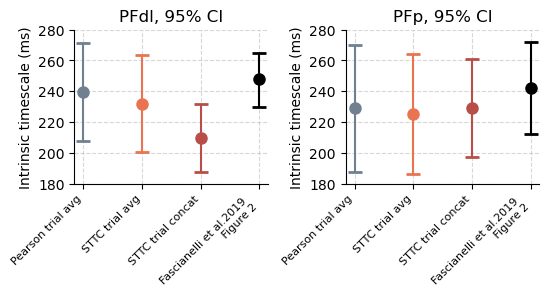

In [26]:
pfdl_conditions = [key for key in population_level_dict_2d.keys() if 'pfdl' in key and 'global' not in key]
pfp_conditions = [key for key in population_level_dict_2d.keys() if 'pfp' in key and 'global' not in key]

pfdl_tau = [population_level_dict_2d[c]['tau_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[0]]
pfdl_tau_lower = [population_level_dict_2d[c]['tau_lower_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[1]]
pfdl_tau_upper = [population_level_dict_2d[c]['tau_upper_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[2]]
pfdl_error_bars = [np.array(pfdl_tau) - np.array(pfdl_tau_lower), np.array(pfdl_tau_upper) - np.array(pfdl_tau)]

pfp_tau = [population_level_dict_2d[c]['tau_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[0]]
pfp_tau_lower = [population_level_dict_2d[c]['tau_lower_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[1]]
pfp_tau_upper = [population_level_dict_2d[c]['tau_upper_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[2]]
pfp_error_bars = [np.array(pfp_tau) - np.array(pfp_tau_lower), np.array(pfp_tau_upper) - np.array(pfp_tau)]

pfdl_conditions = pfdl_conditions + ['paper_f2']
pfp_conditions = pfp_conditions + ['paper_f2']

fig, axes = plt.subplots(1, 2, figsize=(6, 2), sharey=False)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

colors = [color_pearson_trail_avg, color_sttc_trail_avg, color_sttc_trail_concat, 'k']

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfdl_conditions, pfdl_tau, pfdl_error_bars[0], pfdl_error_bars[1], colors)):
    axes[0].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[0].set_xticks(pfdl_conditions)
axes[0].set_title('PFdl, 95% CI')

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfp_conditions, pfp_tau, pfp_error_bars[0], pfp_error_bars[1], colors)):
    axes[1].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[1].set_xticks(pfp_conditions)
axes[1].set_title('PFp, 95% CI')

for ax in axes.flat:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel('Intrinsic timescale (ms)')
    ax.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat', 'Fascianelli et al.2019 \n Figure 2'], 
                       rotation=45, ha='right', fontsize=8)
    ax.set_ylim([180, 280])

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit.svg', bbox_inches='tight')

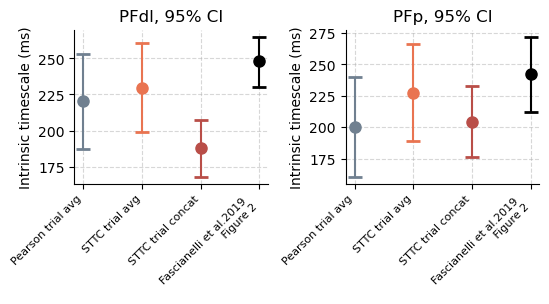

In [40]:
pfdl_conditions = [key for key in population_level_full_dict_2d.keys() if 'pfdl' in key]
pfp_conditions = [key for key in population_level_full_dict_2d.keys() if 'pfp' in key]

pfdl_tau = [population_level_full_dict_2d[c]['tau_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[0]]
pfdl_tau_lower = [population_level_full_dict_2d[c]['tau_lower_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[1]]
pfdl_tau_upper = [population_level_full_dict_2d[c]['tau_upper_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[2]]
pfdl_error_bars = [np.array(pfdl_tau) - np.array(pfdl_tau_lower), np.array(pfdl_tau_upper) - np.array(pfdl_tau)]

pfp_tau = [population_level_full_dict_2d[c]['tau_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[0]]
pfp_tau_lower = [population_level_full_dict_2d[c]['tau_lower_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[1]]
pfp_tau_upper = [population_level_full_dict_2d[c]['tau_upper_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[2]]
pfp_error_bars = [np.array(pfp_tau) - np.array(pfp_tau_lower), np.array(pfp_tau_upper) - np.array(pfp_tau)]

pfdl_conditions = pfdl_conditions + ['paper_f2']
pfp_conditions = pfp_conditions + ['paper_f2']

fig, axes = plt.subplots(1, 2, figsize=(6, 2), sharey=False)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

colors = [color_pearson_trail_avg, color_sttc_trail_avg, color_sttc_trail_concat, 'k']

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfdl_conditions, pfdl_tau, pfdl_error_bars[0], pfdl_error_bars[1], colors)):
    axes[0].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[0].set_xticks(pfdl_conditions)
axes[0].set_title('PFdl, 95% CI')

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfp_conditions, pfp_tau, pfp_error_bars[0], pfp_error_bars[1], colors)):
    axes[1].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[1].set_xticks(pfp_conditions)
axes[1].set_title('PFp, 95% CI')

for ax in axes.flat:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel('Intrinsic timescale (ms)')
    ax.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat', 'Fascianelli et al.2019 \n Figure 2'], 
                       rotation=45, ha='right', fontsize=8)
    #ax.set_ylim([180, 280])

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_full_fit.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_full_fit.svg', bbox_inches='tight')

In [59]:
# Dif between fit on constrained dataset and full dataset 
# Initialize an empty dictionary to store differences
tau_diff_dict = {}

# Iterate over the keys in one of the dictionaries
for key in population_level_full_dict_2d.keys():
    # Compute the difference in tau_ms
    tau_diff = population_level_dict_2d[key]['tau_ms'] - population_level_full_dict_2d[key]['tau_ms']
    
    # Store the results in the new dictionary
    tau_diff_dict[key] = {
        'tau_diff_ms': tau_diff,
    }

tau_diff_dict

{'pearsonr_trial_avg_pfdl': {'tau_diff_ms': 19.283630026445195},
 'pearsonr_trial_avg_pfp': {'tau_diff_ms': 28.815340667003937},
 'sttc_trial_avg_pfdl': {'tau_diff_ms': 2.1954867527668966},
 'sttc_trial_avg_pfp': {'tau_diff_ms': -2.3502243162306513},
 'sttc_trial_concat_pfdl': {'tau_diff_ms': 22.01669828827542},
 'sttc_trial_concat_pfp': {'tau_diff_ms': 24.617703038619425}}

In [45]:
merged_dict = {}
for key, value in population_level_dict_2d.items():
    merged_dict[key] = value
for key, value in population_level_full_dict_2d.items():
    merged_dict[key + "_full"] = value
merged_dict

{'pearsonr_trial_avg_pfdl': {'tau_ms': 239.4427441796883,
  'tau_lower_ms': 207.63940247556073,
  'tau_upper_ms': 271.24608588381585,
  'fit_r_squared': 0.1935218884967227,
  'explained_var': 0.1935218884967227,
  'popt': array([0.23897188, 4.78885488, 0.01975443])},
 'pearsonr_trial_avg_pfp': {'tau_ms': 228.91381205142065,
  'tau_lower_ms': 187.59067357896643,
  'tau_upper_ms': 270.23695052387484,
  'fit_r_squared': 0.12553168556335836,
  'explained_var': 0.12553168556335836,
  'popt': array([0.19090845, 4.57827624, 0.03273799])},
 'sttc_trial_avg_pfdl': {'tau_ms': 231.8073043634339,
  'tau_lower_ms': 200.36814505531785,
  'tau_upper_ms': 263.2464636715499,
  'fit_r_squared': 0.181978417230092,
  'explained_var': 0.1819784172300919,
  'popt': array([0.20779474, 4.63614609, 0.02837647])},
 'sttc_trial_avg_pfp': {'tau_ms': 225.103140537318,
  'tau_lower_ms': 185.9083942263739,
  'tau_upper_ms': 264.2978868482621,
  'fit_r_squared': 0.1317490240363044,
  'explained_var': 0.13174902403630

In [53]:
pfp_conditions

['pearsonr_trial_avg_pfp',
 'pearsonr_trial_avg_pfp_full',
 'sttc_trial_avg_pfp',
 'sttc_trial_avg_pfp_full',
 'sttc_trial_concat_pfp',
 'sttc_trial_concat_pfp_full',
 'paper_f2']

C:\Users\ipoch\AppData\Local\Temp\ipykernel_3212\810457127.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Pearson trial avg PFdl', 'Pearson trial avg PFp',


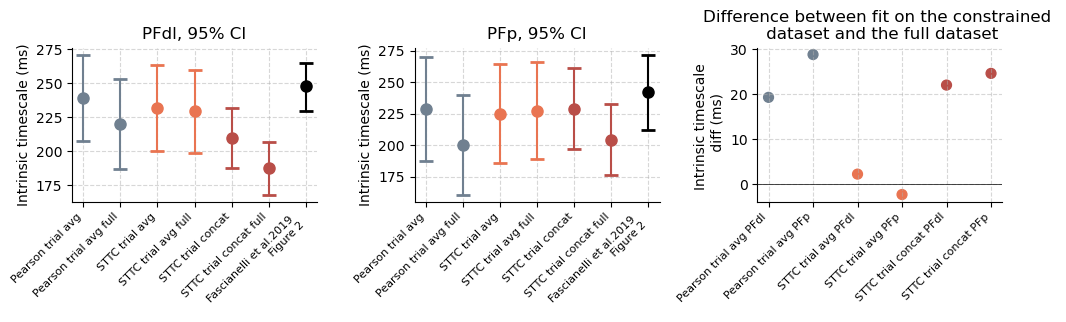

In [73]:
pfdl_conditions = [key for key in merged_dict.keys() if 'pfdl' in key]
pfdl_conditions = sorted(pfdl_conditions, key=lambda x: (x.replace('_full', ''), '_full' in x))
pfp_conditions = [key for key in merged_dict.keys() if 'pfp' in key]
pfp_conditions = sorted(pfp_conditions, key=lambda x: (x.replace('_full', ''), '_full' in x))

pfdl_tau = [merged_dict[c]['tau_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[0]]
pfdl_tau_lower = [merged_dict[c]['tau_lower_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[1]]
pfdl_tau_upper = [merged_dict[c]['tau_upper_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[2]]
pfdl_error_bars = [np.array(pfdl_tau) - np.array(pfdl_tau_lower), np.array(pfdl_tau_upper) - np.array(pfdl_tau)]

pfp_tau = [merged_dict[c]['tau_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[0]]
pfp_tau_lower = [merged_dict[c]['tau_lower_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[1]]
pfp_tau_upper = [merged_dict[c]['tau_upper_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[2]]
pfp_error_bars = [np.array(pfp_tau) - np.array(pfp_tau_lower), np.array(pfp_tau_upper) - np.array(pfp_tau)]

pfdl_conditions = pfdl_conditions + ['paper_f2']
pfp_conditions = pfp_conditions + ['paper_f2']

fig, axes = plt.subplots(1, 3, figsize=(12, 2), sharey=False)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

colors = [color_pearson_trail_avg, color_pearson_trail_avg, 
          color_sttc_trail_avg, color_sttc_trail_avg, 
          color_sttc_trail_concat, color_sttc_trail_concat, 'k']

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfdl_conditions, pfdl_tau, pfdl_error_bars[0], pfdl_error_bars[1], colors)):
    axes[0].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[0].set_xticks(pfdl_conditions)
axes[0].set_title('PFdl, 95% CI')

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfp_conditions, pfp_tau, pfp_error_bars[0], pfp_error_bars[1], colors)):
    axes[1].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[1].set_xticks(pfp_conditions)
axes[1].set_title('PFp, 95% CI')

conditions = list(tau_diff_dict.keys())
tau_diff_values = [tau_diff_dict[key]['tau_diff_ms'] for key in conditions]
axes[2].scatter(conditions, tau_diff_values, 
                color=[color_pearson_trail_avg, color_pearson_trail_avg, 
          color_sttc_trail_avg, color_sttc_trail_avg, 
          color_sttc_trail_concat, color_sttc_trail_concat], 
                s=50, edgecolors=None)
axes[2].axhline(y=0, lw=0.5, c='k')
axes[2].set_xticklabels(['Pearson trial avg PFdl', 'Pearson trial avg PFp', 
                        'STTC trial avg PFdl', 'STTC trial avg PFp',
                        'STTC trial concat PFdl', 'STTC trial concat PFp'], 
                   rotation=45, ha='right', fontsize=8)
axes[2].set_ylabel('Intrinsic timescale \n diff (ms)')
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_title('Difference between fit on the constrained \n dataset and the full dataset')

for ax in axes.flat[:-1]:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel('Intrinsic timescale (ms)')
    ax.set_xticklabels(['Pearson trial avg', 'Pearson trial avg full', 
                    'STTC trial avg', 'STTC trial avg full',
                    'STTC trial concat', 'STTC trial concat full',
                    'Fascianelli et al.2019 \n Figure 2'], 
                       rotation=45, ha='right', fontsize=8)
    #ax.set_ylim([180, 280])

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_diff_fit.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_diff_fit.svg', bbox_inches='tight')

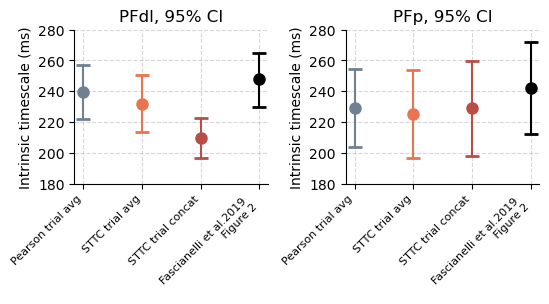

In [27]:
pfdl_conditions = [key for key in population_level_dict.keys() if 'pfdl' in key and 'global' not in key]
pfp_conditions = [key for key in population_level_dict.keys() if 'pfp' in key and 'global' not in key]

pfdl_tau = [population_level_dict[c]['tau_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[0]]
pfdl_tau_lower = [population_level_dict[c]['tau_lower_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[1]]
pfdl_tau_upper = [population_level_dict[c]['tau_upper_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[2]]
pfdl_error_bars = [np.array(pfdl_tau) - np.array(pfdl_tau_lower), np.array(pfdl_tau_upper) - np.array(pfdl_tau)]

pfp_tau = [population_level_dict[c]['tau_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[0]]
pfp_tau_lower = [population_level_dict[c]['tau_lower_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[1]]
pfp_tau_upper = [population_level_dict[c]['tau_upper_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[2]]
pfp_error_bars = [np.array(pfp_tau) - np.array(pfp_tau_lower), np.array(pfp_tau_upper) - np.array(pfp_tau)]

pfdl_conditions = pfdl_conditions + ['paper_f2']
pfp_conditions = pfp_conditions + ['paper_f2']

fig, axes = plt.subplots(1, 2, figsize=(6, 2), sharey=False)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

colors = [color_pearson_trail_avg, color_sttc_trail_avg, color_sttc_trail_concat, 'k']

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfdl_conditions, pfdl_tau, pfdl_error_bars[0], pfdl_error_bars[1], colors)):
    axes[0].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[0].set_xticks(pfdl_conditions)
axes[0].set_title('PFdl, 95% CI')

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfp_conditions, pfp_tau, pfp_error_bars[0], pfp_error_bars[1], colors)):
    axes[1].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[1].set_xticks(pfp_conditions)
axes[1].set_title('PFp, 95% CI')

for ax in axes.flat:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel('Intrinsic timescale (ms)')
    ax.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat', 'Fascianelli et al.2019 \n Figure 2'], 
                       rotation=45, ha='right', fontsize=8)
    ax.set_ylim([180, 280])

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_mean_fit.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_mean_fit.svg', bbox_inches='tight')

#### ACF plots 

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,3), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# Pearsonr trial avg 
axes[0].set_title('Pearsonr trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict['pearsonr_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfp_acf_mean[1:], pfp_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfp']['popt']), color='#b8549b')

pfdl_label = f"PFdl: {int(population_level_dict['pearsonr_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfdl_acf_mean[1:], pfdl_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfdl']['popt']), color='#dd7f28')


# STTC trial avg 
axes[1].set_title('STTC trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict['sttc_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"

axes[1].errorbar(t, pfp_acf_sttc_mean[1:], pfp_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfp']['popt']), color='#b8549b')

pfdl_label = f"PFdl: {int(population_level_dict['sttc_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"

axes[1].errorbar(t, pfdl_acf_sttc_mean[1:], pfdl_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfdl']['popt']), color='#dd7f28')

# STTC trial concat 
axes[2].set_title('STTC trial concat', y=1.15)

pfp_label = f"PFp: {int(population_level_dict['sttc_trial_concat_pfp']['tau_ms'])} ms (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[2].errorbar(t, pfp_acf_sttc_concat_mean[1:], pfp_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfp']['popt']), color='#b8549b')

pfdl_label = f"PFdl: {int(population_level_dict['sttc_trial_concat_pfdl']['tau_ms'])} ms (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
axes[2].errorbar(t, pfdl_acf_sttc_concat_mean[1:], pfdl_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfdl']['popt']), color='#dd7f28')

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.2))

sns.despine()

# if save_fig:
#     fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.png', bbox_inches='tight')
#     fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.svg', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,3), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# PFdl
# Pearsonr trial avg 
axes[0].set_title('PFdl', y=1.35)
pfdl_label = f"Pearson trial avg: {int(population_level_dict['pearsonr_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfdl_acf_mean[1:], pfdl_acf_sem[1:], linestyle='None', marker='.', capsize=5, color=color_pearson_trail_avg, label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfdl']['popt']), color=color_pearson_trail_avg)

pfdl_label = f"STTC trial avg: {int(population_level_dict['sttc_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfdl_acf_sttc_mean[1:], pfdl_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color=color_sttc_trail_avg, label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfdl']['popt']), color=color_sttc_trail_avg)

pfdl_label = f"STTC trial concat: {int(population_level_dict['sttc_trial_concat_pfdl']['tau_ms'])} ms (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfdl_acf_sttc_concat_mean[1:], pfdl_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, 
                 color=color_sttc_trail_concat, label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfdl']['popt']), color=color_sttc_trail_concat)

# PFp
axes[1].set_title('PFp', y=1.35)
pfp_label = f"Pearson trial avg: {int(population_level_dict['pearsonr_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1].errorbar(t, pfp_acf_mean[1:], pfp_acf_sem[1:], linestyle='None', marker='.', capsize=5, color=color_pearson_trail_avg, label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfp']['popt']), color=color_pearson_trail_avg)

# STTC trial avg 
pfp_label = f"STTC trial avg: {int(population_level_dict['sttc_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1].errorbar(t, pfp_acf_sttc_mean[1:], pfp_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color=color_sttc_trail_avg, label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfp']['popt']), color=color_sttc_trail_avg)

# STTC trial concat 
pfp_label = f"STTC trial concat: {int(population_level_dict['sttc_trial_concat_pfp']['tau_ms'])} ms (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[1].errorbar(t, pfp_acf_sttc_concat_mean[1:], pfp_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, 
                 color=color_sttc_trail_concat, label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfp']['popt']), color=color_sttc_trail_concat)

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.35))

fig.suptitle('Autocorrelation (mean + sem) and fit', y=1.3)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_mean_fit_acf.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_mean_fit_acf.svg', bbox_inches='tight')

In [ ]:
# fit using all ACFs - plot individual ACFs overlayed by fit

fig, axes = plt.subplots(1,3, figsize=(15,3), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# Pearsonr trial avg 
axes[0].set_title('Pearsonr trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
# axes[0].errorbar(t, pfp_acf_mean[1:], pfp_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfp']['popt']), color='#b8549b', label=pfp_label)

pfdl_label = f"PFdl: {int(population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
# axes[0].errorbar(t, pfdl_acf_mean[1:], pfdl_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfdl']['popt']), color='#dd7f28', label=pfdl_label)


# STTC trial avg 
axes[1].set_title('STTC trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict_2d['sttc_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"
# axes[1].errorbar(t, pfp_acf_sttc_mean[1:], pfp_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfp']['popt']), color='#b8549b', label=pfp_label)

pfdl_label = f"PFdl: {int(population_level_dict_2d['sttc_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"
# axes[1].errorbar(t, pfdl_acf_sttc_mean[1:], pfdl_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfdl']['popt']), color='#dd7f28', label=pfdl_label)

# STTC trial concat 
axes[2].set_title('STTC trial concat', y=1.15)

pfp_label = f"PFp: {int(population_level_dict_2d['sttc_trial_concat_pfp']['tau_ms'])} ms (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfp']['popt']), color='#b8549b', label=pfp_label)

pfdl_label = f"PFdl: {int(population_level_dict_2d['sttc_trial_concat_pfdl']['tau_ms'])} ms (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
# axes[2].errorbar(t, pfdl_acf_sttc_concat_mean[1:], pfdl_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfdl']['popt']), color='#dd7f28', label=pfdl_label)

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.2))

sns.despine()

# if save_fig:
#     fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.png', bbox_inches='tight')
#     fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.svg', bbox_inches='tight')

In [ ]:
color_pearson_trail_avg = 'slategray' 
color_sttc_trail_avg =  '#E97451' #'chocolate' #'#D6A27A' # 'steelblue'
color_sttc_trail_concat = '#B94E48' # '#9E5345' #'sandybrown'

fig, axes = plt.subplots(1,2, figsize=(10,3), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# PFdl
# Pearsonr trial avg 
axes[0].set_title('PFdl', y=1.35)
pfdl_label = f"Pearson trial avg: {int(population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfdl']['popt']), color=color_pearson_trail_avg, label=pfdl_label)

pfdl_label = f"STTC trial avg: {int(population_level_dict_2d['sttc_trial_avg_pfdl']['tau_ms'])} ms (n={len(
pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfdl']['popt']), color=color_sttc_trail_avg, label=pfdl_label)

pfdl_label = f"STTC trial concat: {int(population_level_dict_2d['sttc_trial_concat_pfdl']['tau_ms'])} ms (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfdl']['popt']), color=color_sttc_trail_concat, label=pfdl_label)

# PFp
axes[1].set_title('PFp', y=1.35)
pfp_label = f"Pearson trial avg: {int(population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfp']['popt']), color=color_pearson_trail_avg, label=pfp_label)

# STTC trial avg 
pfp_label = f"STTC trial avg: {int(population_level_dict_2d['sttc_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfp']['popt']), color=color_sttc_trail_avg, label=pfp_label)

# STTC trial concat 
pfp_label = f"STTC trial concat: {int(population_level_dict_2d['sttc_trial_concat_pfp']['tau_ms'])} ms (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfp']['popt']), color=color_sttc_trail_concat, label=pfp_label)

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.35))

sns.despine()

fig.suptitle('Autocorrelation fit', y=1.3)

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit_acf.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit_acf.svg', bbox_inches='tight')

In [ ]:
population_level_dict_2d

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(10,12), sharey=False)
plt.subplots_adjust(hspace=0.6, wspace=0.4)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# PFdl
# Pearsonr trial avg 
pfdl_label = f"Pearson trial avg: {int(population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_lower_ms'])},{int(
    population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_upper_ms'])}] \n (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0,0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfdl']['popt']), color=color_pearson_trail_avg, label=pfdl_label)
for ii in range(pfdl_acf_2d.shape[0]):
    axes[0,0].plot(t, pfdl_acf_2d[ii, 1:], lw=0.5, color=color_pearson_trail_avg, alpha=0.05)
axes[0,0].set_title('PFdl, ' + pfdl_label, y=1.05)

pfdl_label = f"STTC trial avg: {int(population_level_dict_2d['sttc_trial_avg_pfdl']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['sttc_trial_avg_pfdl']['tau_lower_ms'])},{int(
    population_level_dict_2d['sttc_trial_avg_pfdl']['tau_upper_ms'])}] \n (n={len(
pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[1,0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfdl']['popt']), color=color_sttc_trail_avg, label=pfdl_label)
for ii in range(pfdl_acf_sttc_2d.shape[0]):
    axes[1,0].plot(t, pfdl_acf_sttc_2d[ii, 1:], lw=0.5, color=color_sttc_trail_avg, alpha=0.05)
axes[1,0].set_title('PFdl, ' + pfdl_label, y=1.05)

pfdl_label = f"STTC trial concat: {int(population_level_dict_2d['sttc_trial_concat_pfdl']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['sttc_trial_concat_pfdl']['tau_lower_ms'])},{int(
    population_level_dict_2d['sttc_trial_concat_pfdl']['tau_upper_ms'])}] \n (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
axes[2,0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfdl']['popt']), color=color_sttc_trail_concat, label=pfdl_label)
for ii in range(pfdl_acf_sttc_concat_2d.shape[0]):
    axes[2,0].plot(t, pfdl_acf_sttc_concat_2d[ii, 1:], lw=0.5, color=color_sttc_trail_concat, alpha=0.05)
axes[2,0].set_title('PFdl, ' + pfdl_label, y=1.05)

# PFp
axes[0,1].set_title('PFp', y=1.05)
pfp_label = f"Pearson trial avg: {int(population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_lower_ms'])},{int(
    population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_upper_ms'])}] \n (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[0,1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfp']['popt']), color=color_pearson_trail_avg, label=pfp_label)
for ii in range(pfp_acf_2d.shape[0]):
    axes[0,1].plot(t, pfp_acf_2d[ii, 1:], lw=0.5, color=color_pearson_trail_avg, alpha=0.05)
axes[0,1].set_title('PFp, ' + pfp_label, y=1.05)

# STTC trial avg 
pfp_label = f"STTC trial avg: {int(population_level_dict_2d['sttc_trial_avg_pfp']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['sttc_trial_avg_pfp']['tau_lower_ms'])},{int(
    population_level_dict_2d['sttc_trial_avg_pfp']['tau_upper_ms'])}] \n (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1,1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfp']['popt']), color=color_sttc_trail_avg, label=pfp_label)
for ii in range(pfp_acf_sttc_2d.shape[0]):
    axes[1,1].plot(t, pfp_acf_sttc_2d[ii, 1:], lw=0.5, color=color_sttc_trail_avg, alpha=0.05)
axes[1,1].set_title('PFp, ' + pfp_label, y=1.05)

# STTC trial concat 
pfp_label = f"STTC trial concat: {int(population_level_dict_2d['sttc_trial_concat_pfp']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['sttc_trial_concat_pfp']['tau_lower_ms'])},{int(
    population_level_dict_2d['sttc_trial_concat_pfp']['tau_upper_ms'])}] \n (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[2,1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfp']['popt']), color=color_sttc_trail_concat, label=pfp_label)
for ii in range(pfp_acf_sttc_concat_2d.shape[0]):
    axes[2,1].plot(t, pfp_acf_sttc_concat_2d[ii, 1:], lw=0.5, color=color_sttc_trail_concat, alpha=0.05)
axes[2,1].set_title('PFp, ' + pfp_label, y=1.05)

for ax in axes.flat:
    ax.plot(t, np.zeros(len(t)), lw=0.5, c='k')
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    #ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.15))

sns.despine()

fig.suptitle('Autocorrelation fit and individual ACF traces', y=0.95)

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit_acf_ind_traces.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit_acf_ind_traces.svg', bbox_inches='tight')